In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['sample_submission.csv', 'train.csv', 'test.csv']


<a id="1"></a> <br>
## Basics of Pytorch
### Matrices

In [2]:
import numpy as np

array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [3]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7a933ec24438>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [4]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.4323049  0.35936774 0.49313321]
 [0.57033417 0.37532189 0.38167272]]

tensor([[0.3050, 0.6495, 0.9773],
        [0.8247, 0.8704, 0.2993]])


In [6]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.14454371 0.66619438]
 [0.50421057 0.35609975]]

tensor([[0.1445, 0.6662],
        [0.5042, 0.3561]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.14454371 0.66619438]
 [0.50421057 0.35609975]]



### Basic Math with Pytorch

In [7]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


In [8]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [10]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


<a id="2"></a> <br>
### Linear Regression

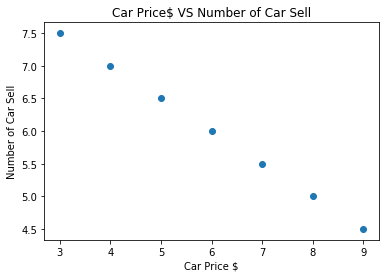

In [11]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

epoch 0, loss 143.12367248535156
epoch 50, loss 5.254277229309082
epoch 100, loss 3.5505359172821045
epoch 150, loss 2.399244785308838
epoch 200, loss 1.6212701797485352
epoch 250, loss 1.0955594778060913
epoch 300, loss 0.7403160929679871
epoch 350, loss 0.5002629160881042
epoch 400, loss 0.3380487561225891
epoch 450, loss 0.2284337431192398
epoch 500, loss 0.15436197817325592
epoch 550, loss 0.10430882126092911
epoch 600, loss 0.07048650830984116
epoch 650, loss 0.04763070493936539
epoch 700, loss 0.03218551725149155
epoch 750, loss 0.02174883894622326
epoch 800, loss 0.014696342870593071
epoch 850, loss 0.009930893778800964
epoch 900, loss 0.0067106192000210285
epoch 950, loss 0.004534552805125713
epoch 1000, loss 0.003064179327338934


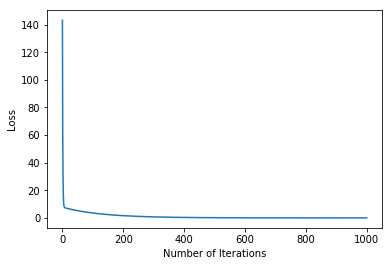

In [12]:
# Linear Regression with Pytorch

# libraries
import torch      
from torch.autograd import Variable     
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

- Number of iteration is 1001.
- Loss is almost zero that you can see from plot or loss in epoch number 1000.
- Now we have a trained model.
- While usign trained model, lets predict car prices.

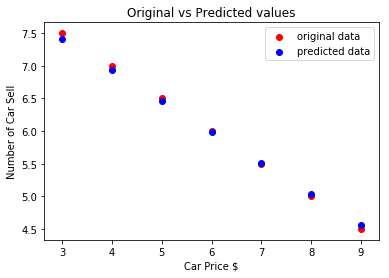

In [13]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

<a id="3"></a> <br>
### Logistic Regression

In [14]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

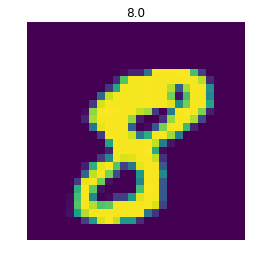

In [15]:
# Prepare Dataset
# load data
train = pd.read_csv(r"../input/train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [16]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8553930521011353  Accuracy: 68%
Iteration: 1000  Loss: 1.6237167119979858  Accuracy: 75%
Iteration: 1500  Loss: 1.3030318021774292  Accuracy: 78%
Iteration: 2000  Loss: 1.205854058265686  Accuracy: 80%
Iteration: 2500  Loss: 1.0430572032928467  Accuracy: 81%
Iteration: 3000  Loss: 0.9426226615905762  Accuracy: 82%
Iteration: 3500  Loss: 0.8949837684631348  Accuracy: 82%
Iteration: 4000  Loss: 0.7554283142089844  Accuracy: 83%
Iteration: 4500  Loss: 0.9816515445709229  Accuracy: 83%
Iteration: 5000  Loss: 0.7963581681251526  Accuracy: 84%
Iteration: 5500  Loss: 0.7545013427734375  Accuracy: 84%
Iteration: 6000  Loss: 0.867022693157196  Accuracy: 84%
Iteration: 6500  Loss: 0.6659964919090271  Accuracy: 84%
Iteration: 7000  Loss: 0.7171083688735962  Accuracy: 85%
Iteration: 7500  Loss: 0.6411340236663818  Accuracy: 85%
Iteration: 8000  Loss: 0.7314873337745667  Accuracy: 85%
Iteration: 8500  Loss: 0.5450932383537292  Accuracy: 85%
Iteration: 9000  Loss: 0.658149123

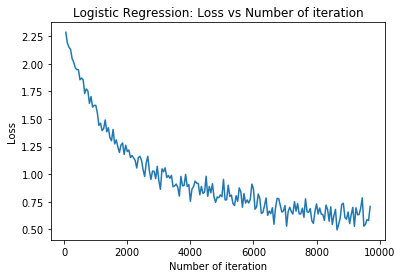

In [18]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

<a id="4"></a> <br>
### Artificial Neural Network (ANN)

In [21]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [23]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [25]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.06356629729270935  Accuracy: 96 %
Iteration: 1000  Loss: 0.03739963471889496  Accuracy: 96 %
Iteration: 1500  Loss: 0.024180764332413673  Accuracy: 96 %
Iteration: 2000  Loss: 0.046261247247457504  Accuracy: 96 %
Iteration: 2500  Loss: 0.06799810379743576  Accuracy: 96 %
Iteration: 3000  Loss: 0.015149221755564213  Accuracy: 96 %
Iteration: 3500  Loss: 0.03719361871480942  Accuracy: 96 %
Iteration: 4000  Loss: 0.009945693425834179  Accuracy: 96 %
Iteration: 4500  Loss: 0.051873140037059784  Accuracy: 96 %
Iteration: 5000  Loss: 0.027996879070997238  Accuracy: 96 %
Iteration: 5500  Loss: 0.0892927274107933  Accuracy: 96 %
Iteration: 6000  Loss: 0.024367637932300568  Accuracy: 96 %
Iteration: 6500  Loss: 0.037491630762815475  Accuracy: 96 %
Iteration: 7000  Loss: 0.024159817025065422  Accuracy: 96 %
Iteration: 7500  Loss: 0.016099395230412483  Accuracy: 96 %
Iteration: 8000  Loss: 0.08756618201732635  Accuracy: 96 %
Iteration: 8500  Loss: 0.0096824262291193  Accur

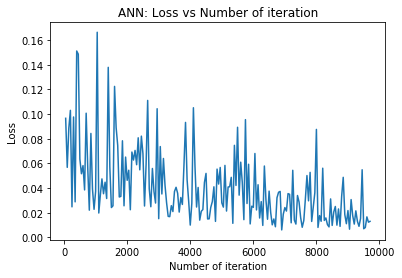

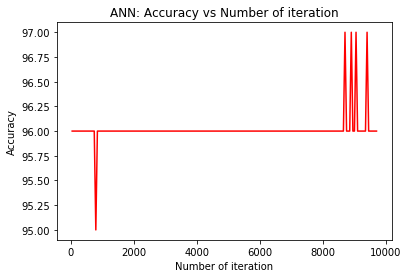

In [26]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()